<a href="https://colab.research.google.com/github/TapashKumar1/TapashKumar1/blob/main/LinearRegression_%26_LassoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Necessary Libraries**
1. **Pandas** is used for working with the main characterstics of the dataset. We can manipulate the data and take a deep dive into it with pandas.
2. **Numpy** is used for working with Numerical Data. Numpy stands for Numerical Python
3. **Matplotlib/Seaborn** both of these libraries are used to visualise the data.
4. **Train_Test_Split** is used for splitting the data into training data and testing data
**(#CODE-- from sklearn.model_selection import train_test_split)**
5. **Linear Regression/Lasso Regressio**n both of these algoriths are used to work on Continous variables
**(#CODE -- from sklearn.model import LinearRegression/Lasso)**
6. **Metrics** is used for testing the accuracy of the Training Data and Testing Data
 (**#CODE -- from sklearn import metrics)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**Data Collection and Processing**

In [2]:
#Loading the Data
car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
#Inspecting the first 10 rows of the DataFrame
car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
# Checking the No. of rows and columns
car_dataset.shape
# The above snippet shows us that there are total of 301 rows and 9 columns in the Dataset

(301, 9)

In [6]:
# Inspecting the Dtypes,Null Values in the Dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# The Dataset is fairly clean and there aren't any Null Values in it. We wont have to change the Dtypes of any features since they are all Correct.

In [8]:
# One can also check Missing Values/Null Values like this:-
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
from pandas.core.arrays.interval import value_counts
# Inspecting the Categorical data
print("Fuel Type:-",car_dataset.Fuel_Type.value_counts(),"\nSeller Type:-",car_dataset.Seller_Type.value_counts(),"\nTransmission Type:- ",car_dataset.Transmission.value_counts())

Fuel Type:- Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 
Seller Type:- Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 
Transmission Type:-  Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [14]:
# Changing the Categorical Data
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

In [15]:
# Inspecting the Updated Dataset
car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


After Converting the Categorical Data into Numerical Data we can move onto the next part of the process

In [31]:
# Splitting Data into Input and Output
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [32]:
# After Splitting the Data into Input and Output (X:Input, Y:Output). Lets take a look at our Input and Output Variables
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [20]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [21]:
# Splitting the Data into Test and Train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [22]:
#  Model Building: Fitting Linear Model
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [25]:
# Predicting the Training Data
train_data_pred = lin_reg_model.predict(X_train)

In [26]:
# Using the R squared error
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8838169193709796


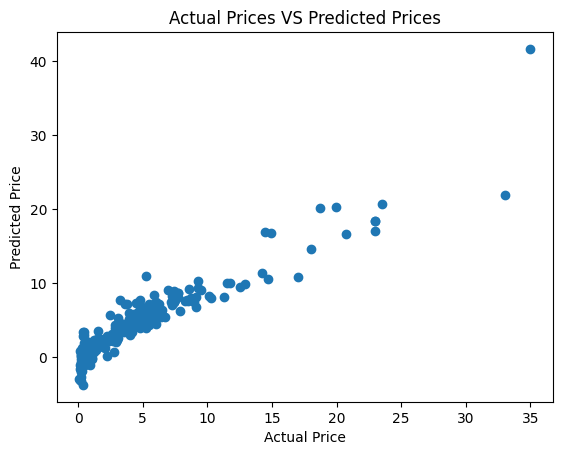

In [34]:
# Visualising the actual and predicted prices
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [35]:
# Predicting the Test Data
test_data_pred = lin_reg_model.predict(X_test)

In [36]:
# Using the R squared error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8401532365377697


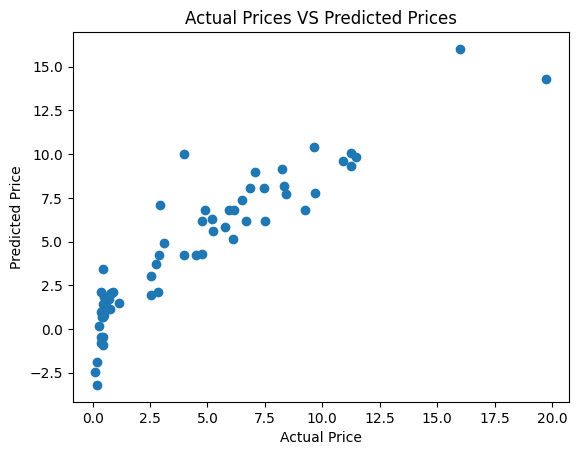

In [37]:
# Visualising the actual and predicted prices
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

**Lasso Regression**

In [38]:
#  Model Building: Fitting Linear Model
lass_reg_model = Lasso()

In [39]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [40]:
# Predicting the Training Data
train_data_pred = lass_reg_model.predict(X_train)

In [41]:
# Using the R squared error
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.843587395258283


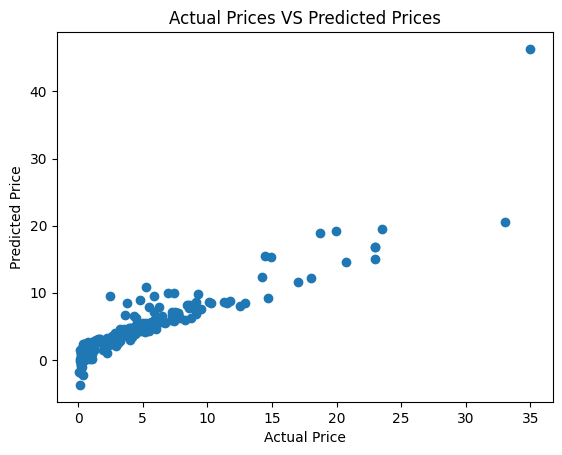

In [42]:
# Visualising the actual and predicted prices
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [43]:
# Predicting the Test Data
test_data_pred = lass_reg_model.predict(X_test)

In [44]:
# Using the R squared error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8497457570738539


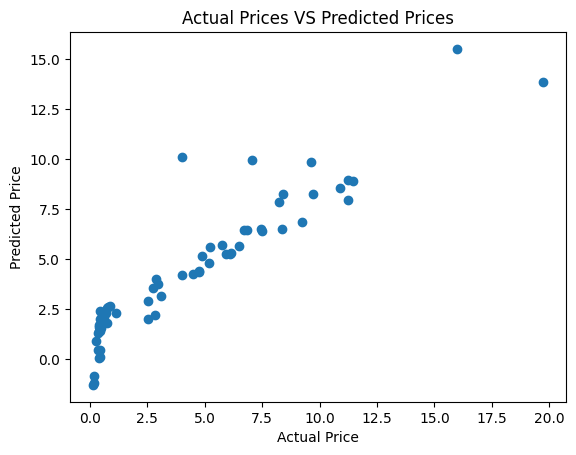

In [45]:
# Visualising the actual and predicted prices
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()